# Movie remakes analysis

In [30]:
# import required libraries

import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
import csv
import os
import re

#load the statistical libraries
from statsmodels.stats import diagnostic
from scipy import stats
import json
import ast

from ada_config.config import CONFIG

## Loading data

In [68]:
# load movie metadata

# Load movie metadata
df_movies = pd.read_csv(CONFIG["data_path"] / "enrich_movie_data.csv")

# Load charachter metadata
df_chars  = pd.read_csv(CONFIG["cmu_path"] / "character_metadata.csv")

# load movie remakes data

movie_remakes_df = pd.read_csv(CONFIG["data_path"] / 'remakes.csv')

C:\Users\Amirmahdi\AppData\Local\Temp\ipykernel_11492\2638662591.py:4: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  df_movies = pd.read_csv(CONFIG["data_path"] / "enrich_movie_data.csv")


In [71]:
# drop nan values from wiidata id
movie_remakes_df = movie_remakes_df.dropna(subset=["remake_wikidata_id", "original_wikidata_id"])

In [72]:
original_movies_wikidata = list(movie_remakes_df["original_wikidata_id"].unique())

remakes_movies_wikidata = list(movie_remakes_df["remake_wikidata_id"].unique())

In [73]:
original_df = df_movies[df_movies["wikidata_id"].isin(original_movies_wikidata)]

remakes_df = df_movies[df_movies["wikidata_id"].isin(remakes_movies_wikidata)]

## Revenue Analysis

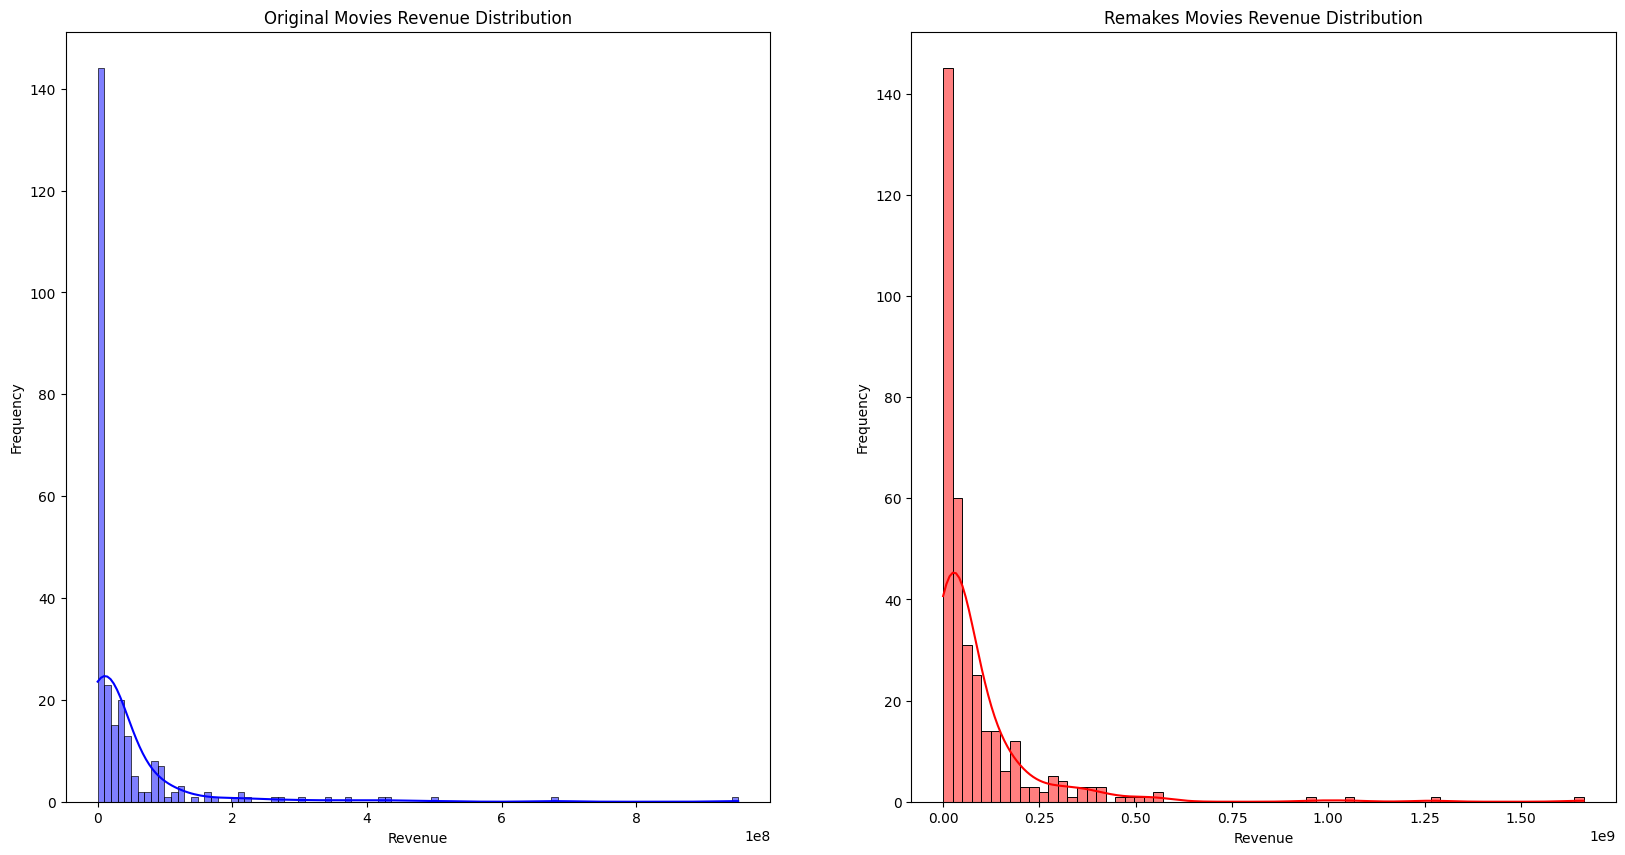

In [79]:
# plot distribition of remakes and original movies revenues

fig, ax = plt.subplots(1, 2, figsize=(20, 10))

sns.histplot(original_df["movie_revenue"], ax=ax[0], color="blue", kde=True)
ax[0].set_title("Original Movies Revenue Distribution")
ax[0].set_xlabel("Revenue")
ax[0].set_ylabel("Frequency")

sns.histplot(remakes_df["movie_revenue"], ax=ax[1], color="red", kde=True)
ax[1].set_title("Remakes Movies Revenue Distribution")
ax[1].set_xlabel("Revenue")
ax[1].set_ylabel("Frequency")

plt.show()

In [85]:
print("Mean revenue for original movies:", original_df["movie_revenue"].mean())

Mean revenue for original movies: 41623667.003802285


In [86]:
print("Mean revenue for whole dataset:", remakes_df["movie_revenue"].mean())

Mean revenue for whole dataset: 88463727.01162791


In [87]:
print("Mean revenue for remakes:", df_movies["movie_revenue"].mean())

Mean revenue for remakes: 41042168.831674956


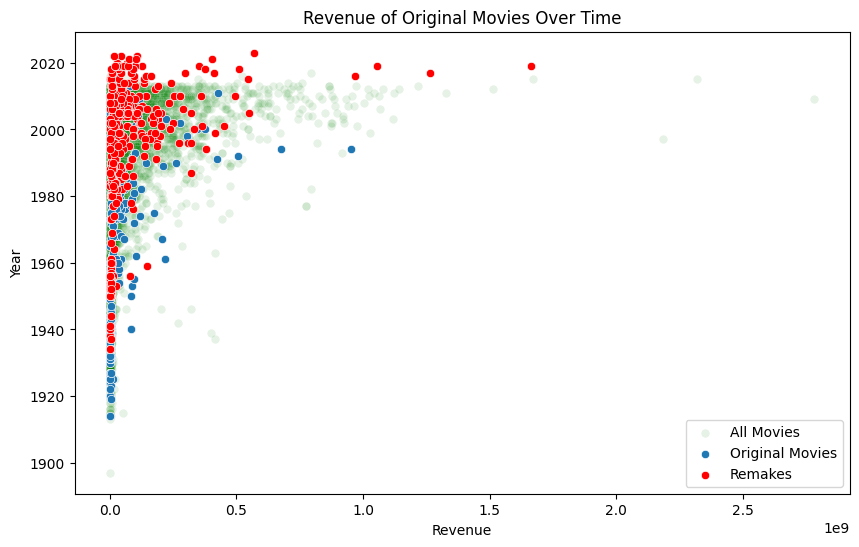

In [90]:
# scatter plot of revenues and runtimes of original movies
plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_movies, x="movie_revenue", y="cmu_year", color="green", alpha=0.1, label="All Movies")

sns.scatterplot(data=original_df, x="movie_revenue", y="cmu_year", label="Original Movies")

sns.scatterplot(data=remakes_df, x="movie_revenue", y="cmu_year", color="red", label="Remakes")


plt.title("Revenue of Original Movies Over Time")
plt.xlabel("Revenue")
plt.ylabel("Year")
plt.show()

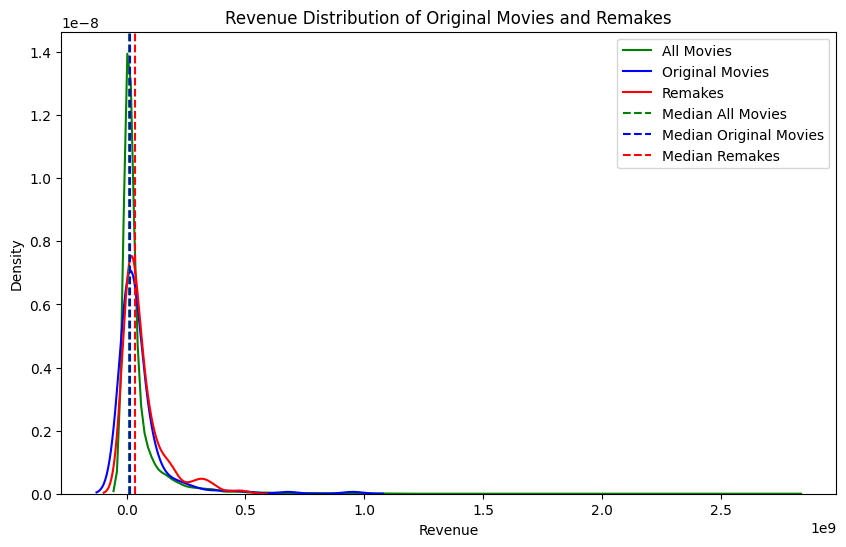

In [ ]:
# kde plot of revenues of original movies

plt.figure(figsize=(10, 6))

sns.kdeplot(data=df_movies["movie_revenue"], color="green", label="All Movies")

sns.kdeplot(data=originals_df["movie_revenue"], color="blue", label="Original Movies")

sns.kdeplot(data=remakes_only["movie_revenue"], color="red", label="Remakes")

# add the median of each group

plt.axvline(df_movies["movie_revenue"].median(), color="green", linestyle="--", label="Median All Movies")
plt.axvline(originals_df["movie_revenue"].median(), color="blue", linestyle="--", label="Median Original Movies")
plt.axvline(remakes_only["movie_revenue"].median(), color="red", linestyle="--", label="Median Remakes")

plt.title("Revenue Distribution of Original Movies and Remakes")
plt.xlabel("Revenue")
plt.ylabel("Density")
plt.legend()
plt.show()

In [ ]:
# add revenue of remakes to remakes_df

remakes_df = pd.merge(remakes_df, df_movies[["movie_name", "movie_year", "movie_revenue"]], left_on = ["remake_1", "remake_1_year"], right_on = ["movie_name", "movie_year"], how = "left")

remakes_df = remakes_df.drop(columns=["movie_name", "movie_year"])

remakes_df = remakes_df.rename(columns={"movie_revenue": "remake_1_revenue"})

In [ ]:
remakes_df = pd.merge(remakes_df, df_movies[["movie_name", "movie_year", "movie_revenue"]], left_on = ["original", "original_year"], right_on = ["movie_name", "movie_year"], how = "left")

remakes_df = remakes_df.drop(columns=["movie_name", "movie_year"])

remakes_df = remakes_df.rename(columns={"movie_revenue": "original_revenue"})

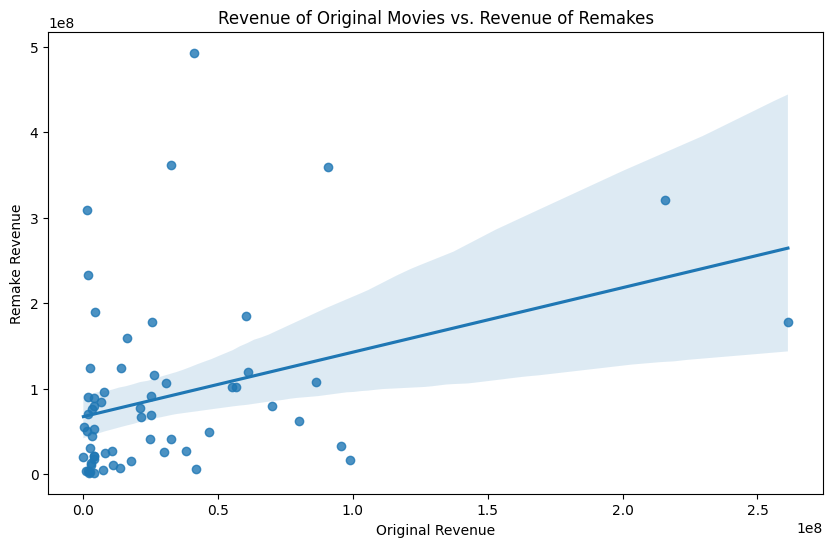

In [ ]:
# scatter plot of revenues of original movies vs. revenues of remakes

plt.figure(figsize=(10, 6))

sns.regplot(data=remakes_df, x="original_revenue", y="remake_1_revenue")

plt.title("Revenue of Original Movies vs. Revenue of Remakes")
plt.xlabel("Original Revenue")
plt.ylabel("Remake Revenue")
plt.show()

In [ ]:
remakes_df["revenue_increase"] = remakes_df["remake_1_revenue"] - remakes_df["original_revenue"]

In [ ]:
remakes_df["year_difference"] = remakes_df["remake_1_year"] - remakes_df["original_year"]

In [ ]:
remakes_df["revenue_increase"].mean()

59949507.35483871

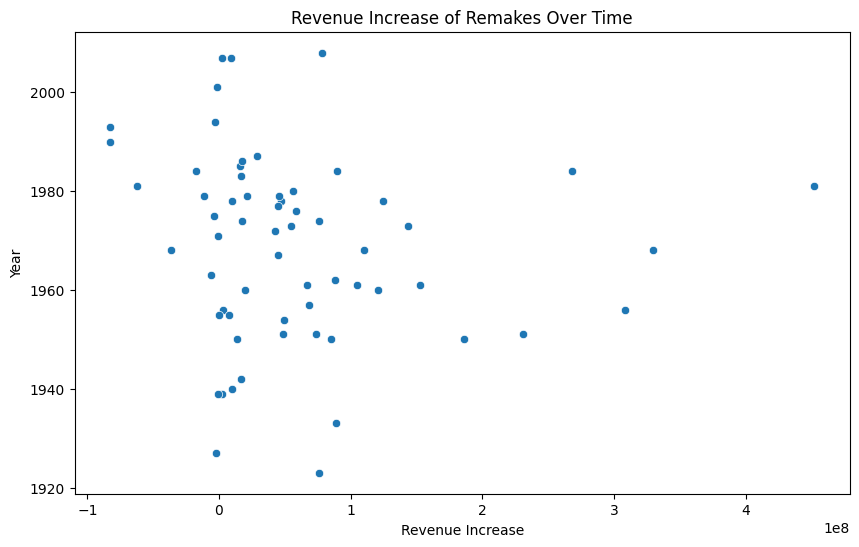

In [ ]:
# scatter plot of revenue increase and year of original movie

plt.figure(figsize=(10, 6))

sns.scatterplot(data=remakes_df, x="revenue_increase", y="original_year")

plt.title("Revenue Increase of Remakes Over Time")
plt.xlabel("Revenue Increase")
plt.ylabel("Year")
plt.show()

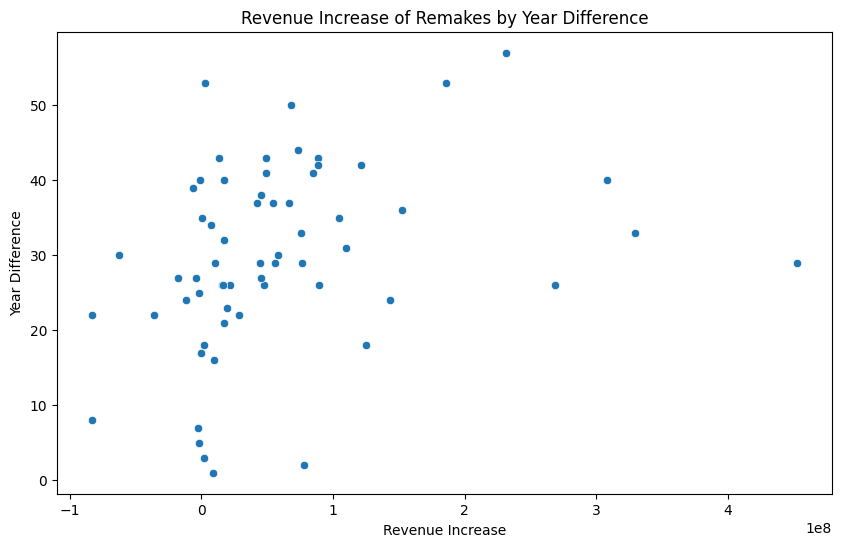

In [ ]:
# scatter plot of revenue increase and year of original movie

plt.figure(figsize=(10, 6))

sns.scatterplot(data=remakes_df, x="revenue_increase", y="year_difference")

plt.title("Revenue Increase of Remakes by Year Difference")
plt.xlabel("Revenue Increase")
plt.ylabel("Year Difference")
plt.show()

## Movie stars analysis

In [ ]:
# movie stars

movie_stars = df_chars["actor_name"].value_counts().head(100).index

In [ ]:
movie_stars_df = df_chars.groupby("Wikipedia_movie_ID")["actor_name"].apply(lambda x: x.isin(movie_stars).sum()).reset_index(name="movie_stars")

In [ ]:
df_movies = pd.merge(df_movies, movie_stars_df, on="Wikipedia_movie_ID", how="left")
df_movies

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,14010832.0,98.0,English Language,United States of America,"Horror, Adventure, Supernatural, Space western...",2001.0,0.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,NaN,95.0,English Language,United States of America,"Crime Drama, Biographical film, Drama, Mystery",2000.0,0.0
2,28463795,/m/0crgdbh,Brun bitter,1988,NaN,83.0,Norwegian Language,Norway,"Drama, Crime Fiction",1988.0,0.0
3,9363483,/m/0285_cd,White Of The Eye,1987,NaN,110.0,English Language,United Kingdom,"Psychological thriller, Erotic thriller, Thriller",1987.0,0.0
4,261236,/m/01mrr1,A Woman in Flames,1983,NaN,106.0,German Language,Germany,Drama,1983.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
81736,35228177,/m/0j7hxnt,Mermaids: The Body Found,2011-03-19,NaN,120.0,English Language,United States of America,Drama,2011.0,NaN
81737,34980460,/m/0g4pl34,Knuckle,2011-01-21,NaN,96.0,English Language,"Ireland, United Kingdom","Biographical film, Documentary, Drama",2011.0,NaN
81738,9971909,/m/02pygw1,Another Nice Mess,1972-09-22,NaN,66.0,English Language,United States of America,"Satire, Comedy",1972.0,0.0
81739,913762,/m/03pcrp,The Super Dimension Fortress Macross II: Lover...,1992-05-21,NaN,150.0,Japanese Language,Japan,"Adventure, Animation, Japanese Movies, Short F...",1992.0,0.0


In [ ]:
# movies which have co-stars

remakes1 = pd.merge(remakes1, movie_stars_df, on="Wikipedia_movie_ID", how="left")
remakes1

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,10705531,/m/02qmrx5,On the Beach,2000,NaN,195.0,English Language,"United States of America, Australia","Science Fiction, Television movie, Action/Adve...",2000.0,0.0
1,4002677,/m/0bb_jr,The 39 Steps,1959-03-13,NaN,93.0,English Language,United Kingdom,"Suspense, Mystery, Film adaptation, Remake, Sp...",1959.0,0.0
2,22358819,/m/05szq8z,Clash of the Titans,2010-03-26,493214993.0,96.0,English Language,"United States of America, United Kingdom","Adventure, Remake, Action/Adventure, Fantasy, ...",2010.0,0.0
3,5884079,/m/0fbrd7,Bangkok Dangerous,2008-08-22,82486154.0,97.0,"Thai Language, English Language",United States of America,"Crime Thriller, Crime Fiction, Action/Adventur...",2008.0,0.0
4,18579003,/m/04f_wj4,The Good Companions,1957-04-22,NaN,104.0,English Language,United Kingdom,Musical,1957.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
382,8634603,/m/027bx6_,The Plank,1979,NaN,30.0,English Language,United Kingdom,"Short Film, Comedy",1979.0,0.0
383,699336,/m/033t6r,Nine Months,1995-07-14,138510230.0,103.0,English Language,United States of America,"Romance Film, Romantic comedy, Comedy, Domesti...",1995.0,0.0
384,4057650,/m/0bfy61,To Be or Not to Be,1983-12-16,13030214.0,107.0,English Language,United States of America,"Parody, Satire, Comedy, LGBT",1983.0,0.0
385,5971762,/m/0fhdck,The Truth About Charlie,2002-10-16,7093284.0,104.0,"Arabic Language, English Language, French Lang...","United States of America, Germany","Suspense, Crime Thriller, Mystery, Comedy, Rom...",2002.0,0.0


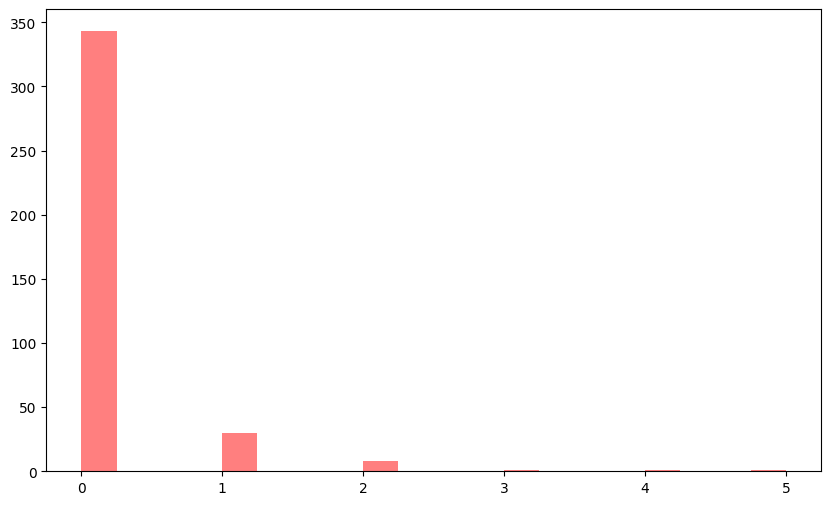

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(remakes1["movie_stars"], bins=20, color="red", alpha=0.5, label="Remakes")
plt.show()

In [ ]:
originals_df = pd.merge(originals_df, movie_stars_df, on="Wikipedia_movie_ID", how="left")
originals_df

,Wikipedia_movie_ID,Freebase_movie_ID,movie_name,movie_date,movie_revenue,movie_runtime,movie_languages,movie_countries,movie_genres,movie_year,movie_stars
0,196176,/m/01bwgr,Straw Dogs,1971-11-03,11148828.0,118.0,English Language,"United States of America, United Kingdom","Drama, Thriller",1971.0,0.0
1,413207,/m/025cm9,Taxi,1998-04-08,NaN,86.0,French Language,France,"Comedy, Crime Fiction, Buddy film",1998.0,0.0
2,1135297,/m/04993j,13 Ghosts,1960-07,NaN,172.0,English Language,United States of America,Horror,1960.0,0.0
3,9404578,/m/0287gvq,The Lady Vanishes,1938,NaN,97.0,English Language,United Kingdom,"Mystery, Comedy, Spy, Black-and-white, Psychol...",1938.0,0.0
4,17711304,/m/047n81_,Rendezvous,1935-10-24,NaN,94.0,English Language,United States of America,"Spy, Black-and-white",1935.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
455,5082822,/m/0d1yd3,Going in Style,1979,NaN,98.0,English Language,United States of America,"Caper story, Crime Comedy, Slapstick, Heist, C...",1979.0,0.0
456,253833,/m/01ln7k,The Mummy,1932-12-22,NaN,74.0,English Language,United States of America,"Horror, Monster movie, Archaeology, Pre-Code, ...",1932.0,1.0
457,80923,/m/0kxg6,A Letter to Three Wives,1949-01-20,NaN,103.0,English Language,United States of America,"Mystery, Film adaptation, Comedy, Drama, Roman...",1949.0,0.0
458,616805,/m/02x0cf,Kiss of Death,1947-08-27,NaN,98.0,English Language,United States of America,"Crime Thriller, Crime Fiction, Film noir, Blac...",1947.0,0.0


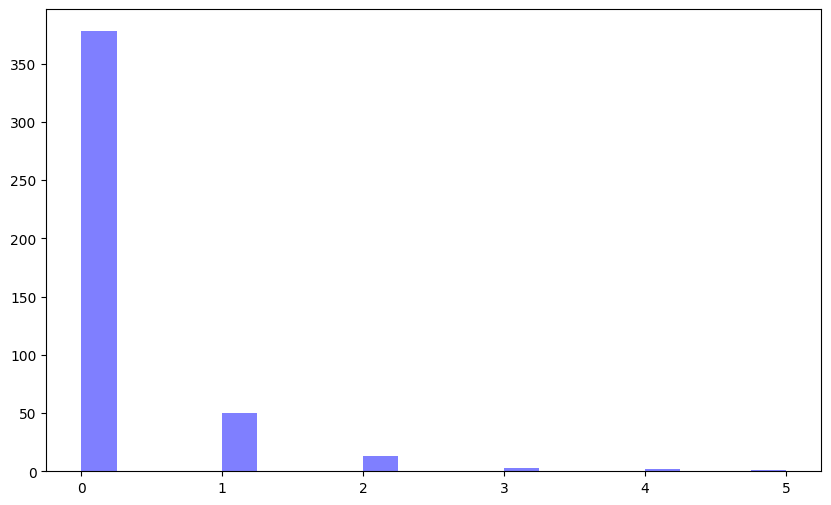

In [ ]:
plt.figure(figsize=(10, 6))

plt.hist(originals_df["movie_stars"], bins=20, color="blue", alpha=0.5, label="Originals")
plt.show()


In [ ]:
# genre analysis

df_movies["movie_genres"].value_counts()

movie_genres
Drama                                                                                                      6851
Comedy                                                                                                     2040
Documentary                                                                                                2001
Comedy film                                                                                                1387
Short Film                                                                                                 1211
                                                                                                           ... 
Epic Western, Romance Film, Western, Action/Adventure, Drama                                                  1
Computer Animation, Satire, Science Fiction, Indie, Fantasy                                                   1
Animation, Short Film, Comedy, Fantasy, Sports                                             

In [ ]:
# TODO: Correlation between the number of stars in the original and remake

## Summary plot analysis